Let's generate some data first sampled from the Clayton copula

In [1]:
from scipy.stats import multivariate_normal, norm, poisson, gamma
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
%load_ext autoreload
%autoreload 2
from CopulaGenerator import CopulaGenerator 
import itertools

In [2]:
cop = CopulaGenerator()

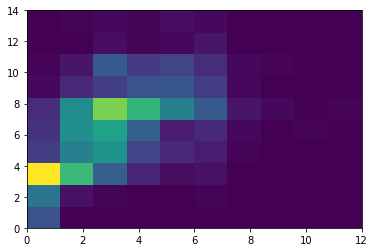

In [3]:
cp = cop.MultiDimensionalClayton(1.5, d=(2,1000))
lambdas = np.random.uniform(0.5, 6, size=2)
data_clayton = cop.generate_data(cp, lambdas)
fig, ax = plt.subplots(1, 1)
ax.hist2d(data_clayton[0], data_clayton[1], bins=10, density=True, cmin=0, cmax=10)
plt.show()
#ax.hist(data_clayton, density=True, histtype='stepfilled', alpha=0.2)


Now we compute the CDF of the multidimensional data.

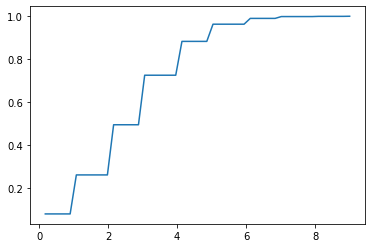

In [8]:
num_bins = 50
counts, bin_edges = np.histogram(data_clayton, bins=num_bins)
cdf = np.cumsum(counts) # formula
plt.plot(bin_edges[1:], cdf/cdf[-1])

In [4]:
poisson_cdf = poisson.cdf(data_clayton[0], 4.1)
poisson_cdf[:40]

array([0.60930829, 0.22381398, 0.87864825, 0.41418154, 0.60930829,
       0.97550825, 0.60930829, 0.60930829, 0.94268792, 0.22381398,
       0.87864825, 0.76931223, 0.76931223, 0.60930829, 0.87864825,
       0.60930829, 0.41418154, 0.41418154, 0.94268792, 0.41418154,
       0.41418154, 0.76931223, 0.41418154, 0.87864825, 0.76931223,
       0.87864825, 0.01657268, 0.60930829, 0.22381398, 0.94268792,
       0.08452064, 0.87864825, 0.41418154, 0.94268792, 0.87864825,
       0.87864825, 0.22381398, 0.60930829, 0.60930829, 0.60930829])

In [5]:
x = poisson.rvs(lambdas[0], size=1000)
poisson_cdf = poisson.cdf(x, lambdas[0])
poisson_cdf[:20]

array([0.75885392, 0.5453483 , 0.5453483 , 0.89197568, 0.89197568,
       0.08257744, 0.5453483 , 0.28852711, 0.75885392, 0.5453483 ,
       0.95837732, 0.08257744, 0.28852711, 0.75885392, 0.5453483 ,
       0.89197568, 0.28852711, 0.75885392, 0.75885392, 0.89197568])

In [4]:
def pmf(x, mu):
    dim = len(x)
    m = list(itertools.combinations_with_replacement([0,1], dim))
    sum_m = np.array([sum(i) for i in m])
    sum_k = np.zeros(dim)
    for k in range(dim):
        indices = np.array(np.where(sum_m == k))
        correct_ms = np.take(m, indices.flatten(), axis=0)
        sum_fx = np.zeros(dim)
        for correct_m in correct_ms:
            sum_fx = np.add(sum_fx, poisson.cdf(np.subtract(x, correct_m), 0.6)) # sum elements from the element-wise
        # substraction between the original x input array and the values mi such that m sums up to k 
            #print("sum_fx: " + str(sum_fx))
        sum_k = np.add(sum_k, ((-1)**k * sum_fx))
    return sum_k
    

In [4]:
x = np.array([1, 2, 3, 4])
correct_m = np.array([0, 1, 1, 0])
np.subtract(x, correct_m)

array([1, 1, 2, 4])

In [86]:
a = np.array([0.35457011, 0.62271375, 0.62271375, 0.81935242])
b = np.array([0.35457011, 0.62271375, 0.62271375, 0.81935242])
np.add(a, b)

array([0.70914022, 1.2454275 , 1.2454275 , 1.63870484])

In [6]:
#x, mu = multipoiss.rvs("clayton", size=1)
x = np.array([1, 2, 3, 4])
mu = 0.6
pmf(x, mu)

array([0.        , 0.09878609, 0.        , 0.00296358])

In [6]:
c = CopulaGenerator()
u = np.array([1, 2, 3, 4])
c.cdf("clayton", 1.8, u)

ZeroDivisionError: 0.0 cannot be raised to a negative power

In [51]:
b = np.array([sum(i) for i in a])
np.where(b == 2)

(array([2]),)

In [54]:
c = np.random.randint(0,10, size=10)

In [55]:
c

array([6, 4, 6, 6, 5, 3, 6, 0, 9, 9])

In [59]:
d = np.random.randint(0, 5, size=10)

In [73]:
pmf(c)

[ 0  1  2  3  4  5  6  7  8  9 10]
[[5]]


ValueError: invalid number of arguments

In [7]:
from MultivariatePoisson import MultivariatePoisson 

In [2]:
mv = MultivariatePoisson()

In [3]:
data = mv.rvs("gaussian")
data.shape

number 0


(1, 2000)